In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

In [43]:
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/9948.json')
events = events.json()

df = json_normalize(events, sep="_")

In [44]:
barcelona = df.loc[(df['team_name']=='Barcelona')]
RealSociedad = df.loc[(df['team_name']=='Real Sociedad')]

In [46]:
barcelona['shot_statsbomb_xg'] = pd.to_numeric(barcelona['shot_statsbomb_xg'], downcast = "float")
RealSociedad['shot_statsbomb_xg'] = pd.to_numeric(RealSociedad['shot_statsbomb_xg'], downcast = "float")

barcelona['minute'] = pd.to_numeric(barcelona['minute'], downcast = "integer")
RealSociedad['minute'] = pd.to_numeric(RealSociedad['minute'], downcast = "integer")

barcelona['cumsum_xg'] = barcelona['shot_statsbomb_xg'].cumsum()
RealSociedad['cumsum_xg'] = RealSociedad['shot_statsbomb_xg'].cumsum()

C:\Users\FF34~1\AppData\Local\Temp/ipykernel_2308/1555200624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barcelona['shot_statsbomb_xg'] = pd.to_numeric(barcelona['shot_statsbomb_xg'], downcast = "float")
C:\Users\FF34~1\AppData\Local\Temp/ipykernel_2308/1555200624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RealSociedad['shot_statsbomb_xg'] = pd.to_numeric(RealSociedad['shot_statsbomb_xg'], downcast = "float")
C:\Users\FF34~1\AppData\Local\Temp/ipykernel_2308/1555200624.py:4: SettingWithCopy

In [95]:
barcelona_df = barcelona[['minute', 'cumsum_xg']]
RealSociedad_df = RealSociedad[['minute', 'cumsum_xg']]

bar_min = [0]
rs_min = [0]
bar_xg = [0.0]
rs_xg = [0.0]

for x in range(len(barcelona_df['minute'])):
    if ~np.isnan(barcelona_df['cumsum_xg'].iloc[x]):
        bar_xg.append(barcelona_df['cumsum_xg'].iloc[x])
        bar_min.append(barcelona_df['minute'].iloc[x])
    
for x in range(len(RealSociedad_df['minute'])):
    if ~np.isnan(RealSociedad_df['cumsum_xg'].iloc[x]):
        rs_xg.append(RealSociedad_df['cumsum_xg'].iloc[x])
        rs_min.append(RealSociedad_df['minute'].iloc[x])
bar_xg

[0.0,
 0.02409906,
 0.072645895,
 0.109080106,
 0.29333842,
 0.40759218,
 0.50751585,
 0.5293103,
 0.5567703,
 0.654847,
 0.8785792,
 0.9276674,
 1.0622987]

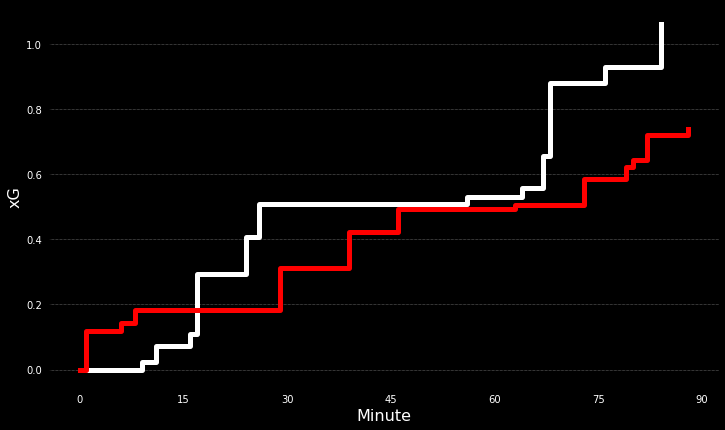

In [98]:
fig, ax = plt.subplots(figsize=(12,7))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

ax.grid(ls = 'dotted',lw = .5,color = 'lightgrey',axis = 'y',zorder = 1)

plt.xticks([0,15,30,45,60,75,90],color = 'white')
plt.yticks(color = 'white')
plt.xlabel('Minute',color = 'white',fontsize = 16)
plt.ylabel('xG',color = 'white',fontsize = 16)
 
ax.step(bar_min, bar_xg, color = 'white', linewidth = 5,where='post')    
ax.step(rs_min, rs_xg, color = 'red', linewidth = 5,where='post')
